## Crypto Arbitrage

As Bitcoin trades on markets across the globe, our fictitious firm seeks to capitalize on simultaneous price dislocations across markets leverage my time and knowledge of Pandas? That said I will sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. I will do the following for each data set:

1. Collect the data.
2. Prepare the data.
3. Analyze the data. 

###  Importing the required libraries & dependencies.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Before I can read in any data, I should know where that data is. The csv's with my data are located in the resources folder.
# This is where I make use of pathlib Path
bitstamp_path = Path("../Challenge3_BitCoin_Arbitrage/Resources/bitstamp.csv")
coinbase_path = Path("../Challenge3_BitCoin_Arbitrage/Resources/coinbase.csv")


With that done I will 
    1. Create the two dataframes needed to house my data
    2. Set the index on both dataframes to the column "Date"
    3. Set the parse_dates and infer_datetime_format parameters

In [3]:
# Bitstamp and Coinbase Dataframe creation 

bitstamp_df = pd.read_csv(
    bitstamp_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)
coinbase_df = pd.read_csv(
    coinbase_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Data Import Confirmation

display(bitstamp_df.head())
print("\n") # added an extra line for readibility
display(coinbase_df.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Data Prep and Clean Dataframes

To prep and clean your data for analysis, complete the following steps:

1. For the bitstamp and coinbase DataFrames, 
    1. Replace or drop all `NaN`, or missing, values in the DataFrame.
    2. Review the data for duplicated values, and drop them if necessary.
2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.
3. Convert the data type of the Close column to a `float`.

### Step 1: For the DataFrames in questions do the following:
1. Replace or drop all `NaN`, or missing, values in the DataFrame.
2. Review the data for duplicate values, and drop them if necessary

In [5]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
print(f"These are the dimensions of your dataframes before cleansing (rows, columns): ")
print(f"\t 1. bitstamp dataframe (before):{bitstamp_df.shape}")
print(f"\t 2. coinbase dataframe (before):{coinbase_df.shape}")
print("\n")
# Dropping NaN's
bitstamp_df = bitstamp_df.dropna().copy()
coinbase_df = coinbase_df.dropna().copy()

# Dropping Duplicates
coinbase_df = coinbase_df.drop_duplicates(keep=False)
bitstamp_df = bitstamp_df.drop_duplicates(keep=False)

print(f"These are the dimensions of your dataframes after cleansing (rows,columns): ")
print(f"\t 1. bitstamp dataframe(after):{bitstamp_df.shape}")
print(f"\t 2. coinbase dataframe(after):{coinbase_df.shape}")


These are the dimensions of your dataframes before cleansing (rows, columns): 
	 1. bitstamp dataframe (before):(129540, 7)
	 2. coinbase dataframe (before):(129540, 7)


These are the dimensions of your dataframes after cleansing (rows,columns): 
	 1. bitstamp dataframe(after):(129067, 7)
	 2. coinbase dataframe(after):(129322, 7)


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [6]:
# Use the str.replace function to remove the dollar sign, 
# Just want to check the columns in each df to make sure  "Close: is common to both and spelled correctly
bitstamp_df.columns.to_list()
coinbase_df.columns.to_list()

bitstamp_df["Close"] = bitstamp_df["Close"].str.replace("$", "",regex=False).astype("float")
coinbase_df["Close"] = coinbase_df["Close"].str.replace("$", "",regex=False).astype("float")

# Convert the Close data type to a float
bitstamp_df.dtypes
coinbase_df.dtypes

# Data Import Confirmation
display(bitstamp_df.head(10))
#print("\n") # added an extra line for readibility
display(coinbase_df.head(10))

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,13610.00,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,13580.00,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,13579.00,19.322370,261942.833550,13556.454543


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
2018-01-01 00:05:00,13583.45,13583.45,13564.29,13564.35,4.746346,64468.680520,13582.802658
2018-01-01 00:06:00,13583.28,13583.28,13510.59,13539.00,25.791324,349096.113670,13535.409019
2018-01-01 00:07:00,13539.54,13539.54,13510.00,13511.02,17.506747,236818.029240,13527.243628
2018-01-01 00:08:00,13511.02,13539.00,13510.00,13528.52,23.230759,314094.418090,13520.626642


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [7]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,'Close']
coinbase_sliced = coinbase_df.loc[:,'Close']
# Review the first five rows of the DataFrame
display(bitstamp_sliced.head())
display(coinbase_sliced.head())

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [8]:
# Generate the summary statistics for the bitstamp DataFrame
display(bitstamp_sliced.describe())
print("\n")
display(coinbase_sliced.describe())

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Bitcoin Closing Price v Time 2018'}, xlabel='Timestamp'>

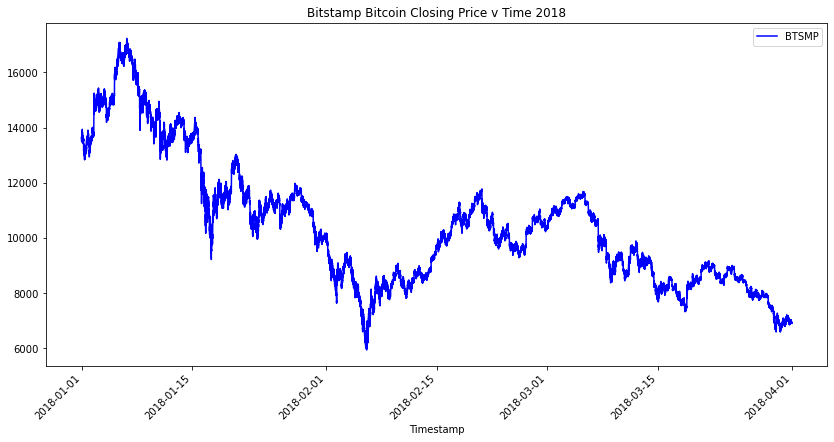

In [9]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend=True,figsize=(14,7), rot=45, color="blue",title='Bitstamp Bitcoin Closing Price v Time 2018',label='BTSMP')

<AxesSubplot:title={'center':'Coinbase Bitcoin Closing price v. Time 2018'}, xlabel='Timestamp'>

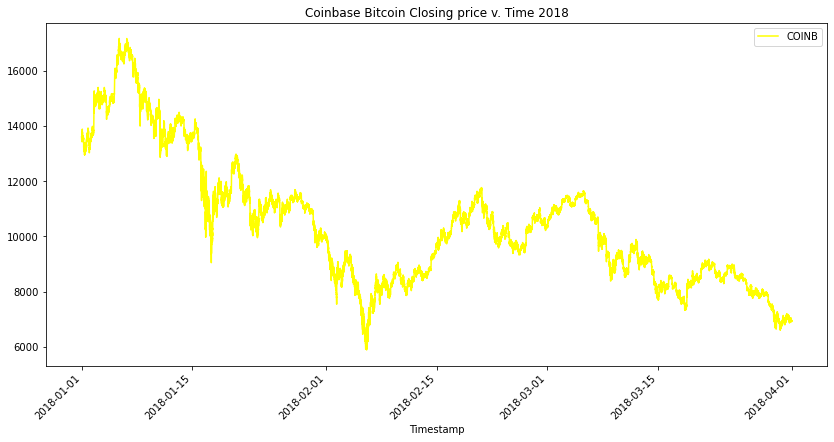

In [10]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend=True,figsize=(14,7), rot=45, color="yellow",title='Coinbase Bitcoin Closing price v. Time 2018',label='COINB')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price 2018'}, xlabel='Timestamp'>

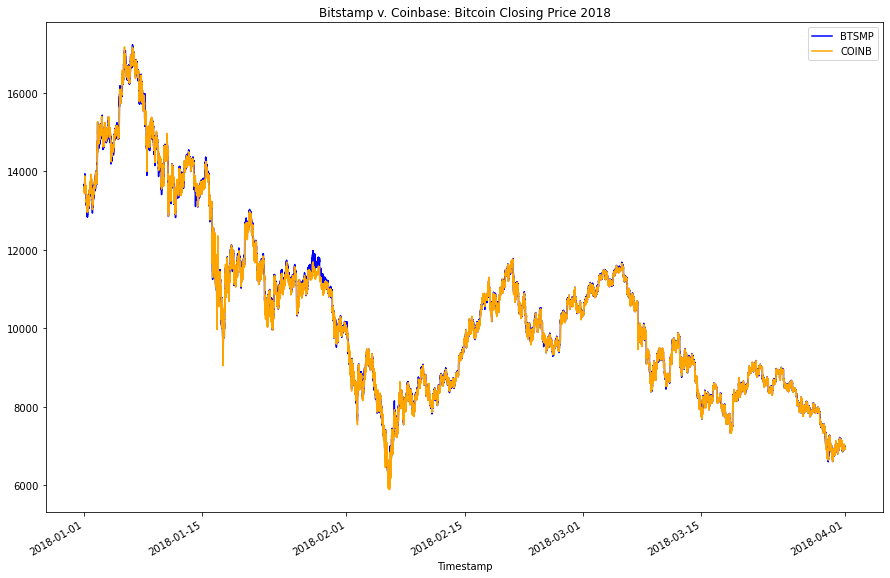

In [121]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_df['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price 2018", color="blue", label="BTSMP")
coinbase_df['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")


<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price Jan 2018'}, xlabel='Timestamp'>

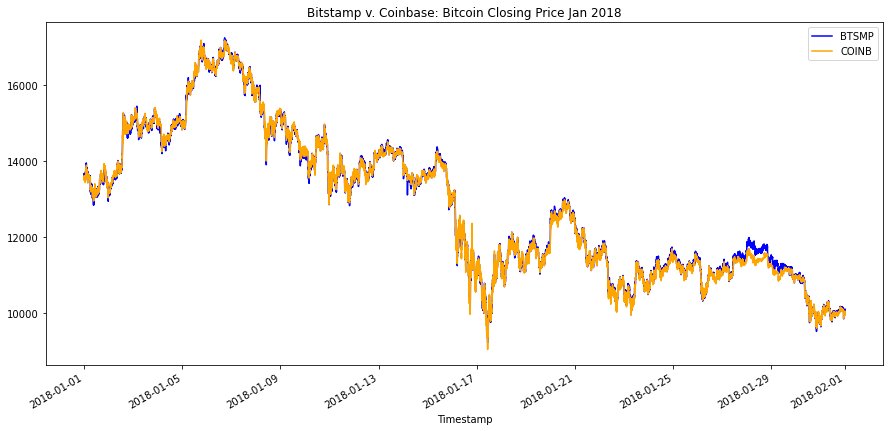

In [12]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset

bitstamp_df['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price Jan 2018", color="blue", label="BTSMP")
coinbase_df['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018'}, xlabel='Timestamp'>

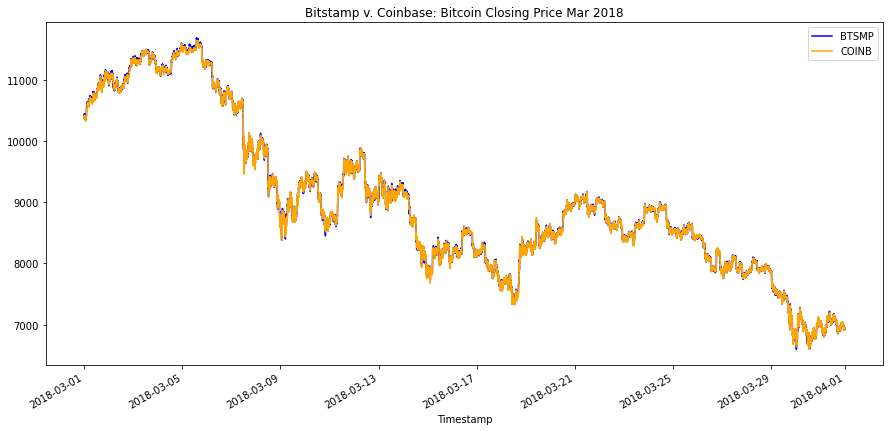

In [13]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_df['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018", color="blue", label="BTSMP")
coinbase_df['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018'}, xlabel='Timestamp'>

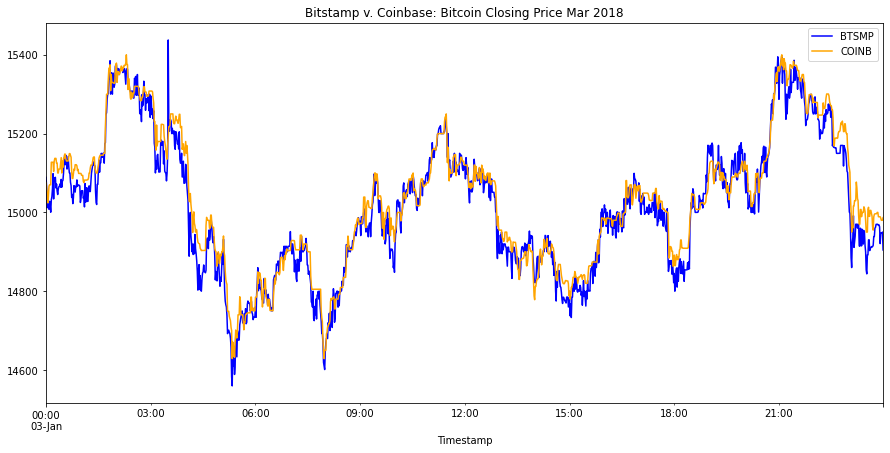

In [14]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-01-03'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018", color="blue", label="BTSMP")
coinbase_df['Close'].loc['2018-01-03'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")

In [15]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_df['Close'].loc['2018-01-03']- bitstamp_df['Close'].loc['2018-01-03']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       20.860542
std        34.377651
min      -247.650000
25%        -2.015000
50%        19.280000
75%        43.445000
max       139.180000
Name: Close, dtype: float64

<AxesSubplot:>

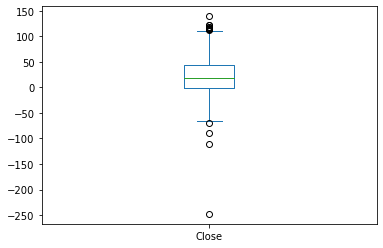

In [16]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018'}, xlabel='Timestamp'>

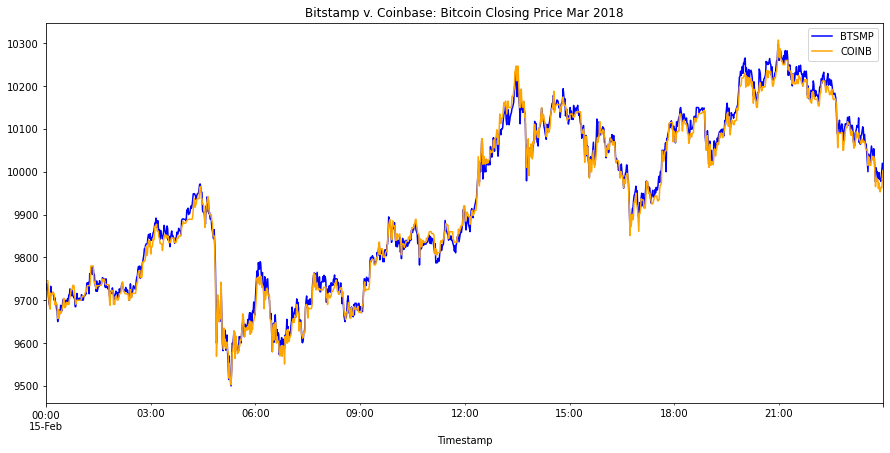

In [17]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-02-15'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018", color="blue", label="BTSMP")
coinbase_df['Close'].loc['2018-02-15'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")

In [18]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_df['Close'].loc['2018-02-15']- bitstamp_df['Close'].loc['2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:>

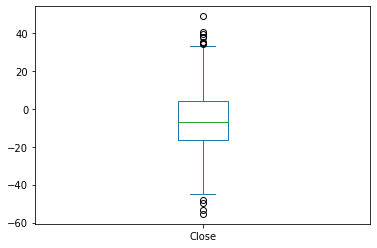

In [19]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018'}, xlabel='Timestamp'>

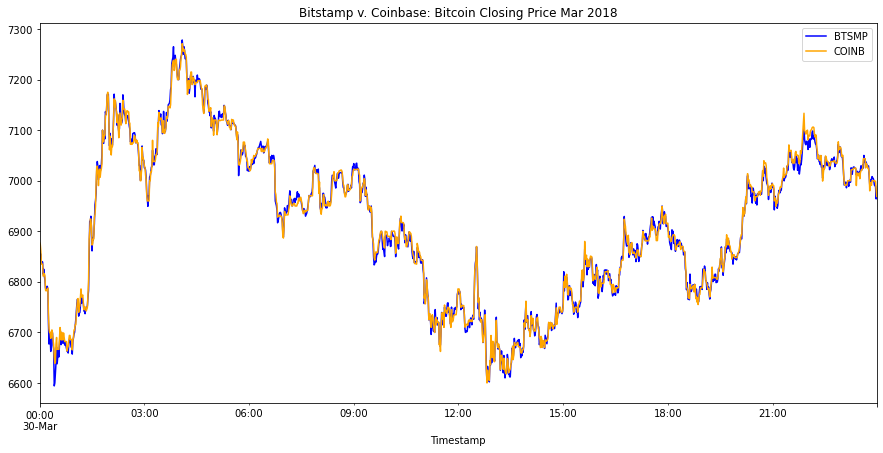

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df['Close'].loc['2018-03-30'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase: Bitcoin Closing Price Mar 2018", color="blue", label="BTSMP")
coinbase_df['Close'].loc['2018-03-30'].plot(legend=True, figsize=(15, 7), color="orange", label="COINB")

In [28]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_df['Close'].loc['2018-03-30']- bitstamp_df['Close'].loc['2018-03-30']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
Name: Close, dtype: float64

<AxesSubplot:>

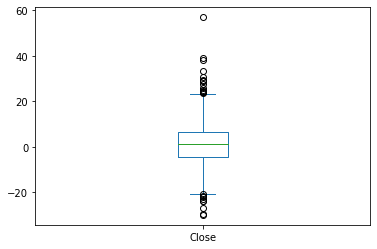

In [29]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [180]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_erly = coinbase_df['Close'].loc['2018-01-14'] - bitstamp_df['Close'].loc['2018-01-14']
arbitrage_spread_mddl = coinbase_df['Close'].loc['2018-02-02'] - bitstamp_df['Close'].loc['2018-02-02']
arbitrage_spread_lte = coinbase_df['Close'].loc['2018-03-07'] - bitstamp_df['Close'].loc['2018-03-07']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbtrg_spread_grtr_erly = arbitrage_spread_erly[arbitrage_spread_erly>0]
arbtrg_spread_grtr_mddl = arbitrage_spread_mddl[arbitrage_spread_mddl>0]
arbtrg_spread_grtr_lte = arbitrage_spread_lte[arbitrage_spread_lte>0]


In [181]:
print(f"Summary Statistics for the arbtrage spread early dataframe:")
display(arbtrg_spread_grtr_erly.describe())
print("\n")
print(f"Summary Statistics for the arbtrage spread middle dataframe:")
display(arbtrg_spread_grtr_mddl.describe())
print("\n")
print(f"Summary Statistics for the arbtrage spread late dataframe:")
display(arbtrg_spread_grtr_lte.describe())
print("\n")

Summary Statistics for the arbtrage spread early dataframe:


count    1001.000000
mean       32.275974
std        28.313976
min         0.010000
25%        13.420000
50%        26.770000
75%        45.080000
max       468.000000
Name: Close, dtype: float64



Summary Statistics for the arbtrage spread middle dataframe:


count    322.000000
mean      21.523509
std       22.085195
min        0.010000
25%        6.972500
50%       16.490000
75%       30.420000
max      188.550000
Name: Close, dtype: float64



Summary Statistics for the arbtrage spread late dataframe:


count    833.000000
mean      11.954214
std       11.164069
min        0.010000
25%        4.420000
50%        9.700000
75%       16.790000
max      130.030000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [184]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_rtn_erly = arbitrage_spread_erly[arbitrage_spread_erly>0]/bitstamp_df['Close'].loc['2018-01-14']
spread_rtn_mddl = arbitrage_spread_mddl[arbitrage_spread_mddl>0]/bitstamp_df['Close'].loc['2018-02-02']
spread_rtn_lte = arbitrage_spread_lte[arbitrage_spread_lte>0]/bitstamp_df['Close'].loc['2018-03-07']

# Review the spread return DataFrame
display(spread_rtn_erly.head())
display(spread_rtn_mddl.head())
display(spread_rtn_lte.head())

display(spread_rtn_erly.describe())
print("\n")
display(spread_rtn_mddl.describe())
print("\n")
display(spread_rtn_lte.describe())


Timestamp
2018-01-14 00:00:00         NaN
2018-01-14 00:01:00         NaN
2018-01-14 00:02:00    0.000712
2018-01-14 00:03:00    0.000148
2018-01-14 00:04:00         NaN
Name: Close, dtype: float64

Timestamp
2018-02-02 00:00:00    0.001273
2018-02-02 00:01:00    0.001331
2018-02-02 00:02:00    0.002716
2018-02-02 00:03:00    0.001396
2018-02-02 00:04:00         NaN
Name: Close, dtype: float64

Timestamp
2018-03-07 00:00:00         NaN
2018-03-07 00:01:00         NaN
2018-03-07 00:02:00    0.000069
2018-03-07 00:03:00         NaN
2018-03-07 00:04:00         NaN
Name: Close, dtype: float64

count    1.001000e+03
mean     2.396572e-03
std      2.128579e-03
min      7.326002e-07
25%      9.896519e-04
50%      1.978062e-03
75%      3.344663e-03
max      3.570611e-02
Name: Close, dtype: float64

count    322.000000
mean       0.002598
std        0.002711
min        0.000001
25%        0.000830
50%        0.001933
75%        0.003701
max        0.022955
Name: Close, dtype: float64

count    8.330000e+02
mean     1.184229e-03
std      1.127859e-03
min      9.385265e-07
25%      4.346331e-04
50%      9.461248e-04
75%      1.646155e-03
max      1.371624e-02
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [185]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
print(f"Early Profitable Trades:")
profitable_trds_erly =  spread_rtn_erly[spread_rtn_erly > .01]
display(profitable_trds_erly.head())
print("\n")

print(f"Middle Profitable Trades:")
profitable_trds_mddl =  spread_rtn_mddl[spread_rtn_mddl > .01]
display(profitable_trds_mddl.head())
print("\n")

print(f"Late Profitable Trades:")
profitable_trds_lte =  spread_rtn_lte[spread_rtn_lte > .01]
display(profitable_trds_lte.head())
print("\n")


Early Profitable Trades:


Timestamp
2018-01-14 04:08:00    0.035706
2018-01-14 04:09:00    0.013060
2018-01-14 04:15:00    0.010334
2018-01-14 07:10:00    0.010251
2018-01-14 07:11:00    0.010629
Name: Close, dtype: float64



Middle Profitable Trades:


Timestamp
2018-02-02 07:58:00    0.021825
2018-02-02 07:59:00    0.018888
2018-02-02 08:00:00    0.022955
2018-02-02 08:01:00    0.013697
Name: Close, dtype: float64



Late Profitable Trades:


Timestamp
2018-03-07 11:40:00    0.010342
2018-03-07 12:22:00    0.013716
2018-03-07 12:27:00    0.012261
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [186]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trds_erly.describe())
display(profitable_trds_mddl.describe())
display(profitable_trds_lte.describe())

count    5.000000
mean     0.015996
std      0.011079
min      0.010251
25%      0.010334
50%      0.010629
75%      0.013060
max      0.035706
Name: Close, dtype: float64

count    4.000000
mean     0.019341
std      0.004135
min      0.013697
25%      0.017590
50%      0.020356
75%      0.022107
max      0.022955
Name: Close, dtype: float64

count    3.000000
mean     0.012106
std      0.001692
min      0.010342
25%      0.011301
50%      0.012261
75%      0.012988
max      0.013716
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [ ]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE
#profit_middle =
#profit_late =

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE